# **Essential Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential,save_model,load_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score
import xgboost as xgb

# **Preprocessing of the Data**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/internship/Trainig Material/Data/merged_canopy/canopy_ml.csv")

In [ ]:
df

,Band1,Band2,Band3,Band4,NDVI,GCI,LAI,EVI,class
0,1427,1802,1413,7312,0.676103,0.604564,0.270441,2.898202,0
1,1444,1834,1417,7351,0.676779,0.600653,0.270712,2.952826,0
2,1456,1799,1436,7303,0.671358,0.604702,0.268543,2.933500,0
3,1444,1824,1428,7212,0.669444,0.596282,0.267778,2.920622,0
4,1448,1810,1492,6736,0.637336,0.576410,0.254934,2.714848,0
...,...,...,...,...,...,...,...,...,...
1668,1380,1550,1391,4760,0.547716,0.508716,0.219086,3.054951,1
1669,1409,1578,1387,4687,0.543299,0.496249,0.217320,3.377687,1
1670,1416,1576,1412,4529,0.524659,0.483702,0.209864,3.271411,1
1671,1422,1598,1422,4428,0.513846,0.469632,0.205538,3.273084,1


In [ ]:
df[df['class']==0]['class'].value_counts()
df[df['class']==1]['class'].value_counts()

class
1    917
Name: count, dtype: int64

In [ ]:
import pandas as pd

# Assuming df is your original DataFrame
# Slice the first 500 rows
first_500 = df.iloc[:500]

# Slice the last 500 rows
last_500 = df.iloc[-500:]

# Concatenate the two slices to create a new DataFrame
new_df = pd.concat([first_500, last_500])

# If you want to reset the index of the new DataFrame
# new_df.reset_index(drop=True, inplace=True)
# Reset the index of the new DataFrame
new_df.reset_index(drop=True, inplace=True)

# Display the new DataFrame
new_df['class'].value_counts()


class
0    500
1    500
Name: count, dtype: int64

In [ ]:
df[df['class'] == 1]

,Band1,Band2,Band3,Band4,NDVI,GCI,LAI,EVI,class
756,1341,1618,1411,4106,0.488490,0.434661,0.195396,2.678394,1
757,1362,1638,1427,4150,0.488255,0.434001,0.195302,2.725180,1
758,1384,1647,1411,4209,0.497865,0.437500,0.199146,3.046603,1
759,1346,1634,1410,4250,0.501767,0.444596,0.200707,2.714067,1
760,1344,1632,1420,4542,0.523650,0.471331,0.209460,2.616493,1
...,...,...,...,...,...,...,...,...,...
1668,1380,1550,1391,4760,0.547716,0.508716,0.219086,3.054951,1
1669,1409,1578,1387,4687,0.543299,0.496249,0.217320,3.377687,1
1670,1416,1576,1412,4529,0.524659,0.483702,0.209864,3.271411,1
1671,1422,1598,1422,4428,0.513846,0.469632,0.205538,3.273084,1


In [ ]:
df1=pd.read_csv("/content/drive/MyDrive/internship/Trainig Material/Data/merged_canopy/df_canopy_1")

df1["class"]=0

# for balacing the classes of zero and one

df1=df1.iloc[0:855,:]

df1=df1.drop(columns={"Unnamed: 0"})


In [ ]:
df2=pd.read_csv("/content/drive/MyDrive/internship/Trainig Material/Data/merged_no_canopy/df_no_canopy_1")

df2["class"]=1

df2=df2.iloc[0:844,:]

df2=df2.drop(columns={"Unnamed: 0"})

preprocess_df=pd.concat([new_df,df1,df2])

print(preprocess_df.shape)

(2699, 9)


In [ ]:
preprocess_df["class"].value_counts()

class
0    1355
1    1344
Name: count, dtype: int64

In [ ]:
# @title Data Cleaning
preprocess_df.isna().sum()

Band1    0
Band2    0
Band3    0
Band4    0
NDVI     0
GCI      0
LAI      0
EVI      0
class    0
dtype: int64

In [ ]:
preprocess_df.isnull().sum()

Band1    0
Band2    0
Band3    0
Band4    0
NDVI     0
GCI      0
LAI      0
EVI      0
class    0
dtype: int64

In [ ]:
preprocess_df.duplicated().sum()

11

In [ ]:
preprocess_df=preprocess_df.drop_duplicates()

In [ ]:
preprocess_df.duplicated().sum()

0

In [ ]:
preprocess_df['class'].value_counts()

class
0    1344
1    1344
Name: count, dtype: int64

In [ ]:
# Optimization Soil-Adjusted Vegetation Index (OSAVI)
# Green Normalized Difference Vegetation Index (GNDVI)

def osavi(row):
    return (row['Band4']-row['Band3'])/((row['Band4']+row['Band4'])+0.16)

preprocess_df['osavi']=preprocess_df.apply(osavi,axis=1)

In [ ]:
preprocess_df.head()

,Band1,Band2,Band3,Band4,NDVI,GCI,LAI,EVI,class,osavi
0,1427,1802,1413,7312,0.676103,0.604564,0.270441,2.898202,0,0.403374
1,1444,1834,1417,7351,0.676779,0.600653,0.270712,2.952826,0,0.403614
2,1456,1799,1436,7303,0.671358,0.604702,0.268543,2.933500,0,0.401680
3,1444,1824,1428,7212,0.669444,0.596282,0.267778,2.920622,0,0.400994
4,1448,1810,1492,6736,0.637336,0.576410,0.254934,2.714848,0,0.389247


In [ ]:
# preprocess_df = preprocess_df.drop(columns=['LAI','GCI','EVI'])
preprocess_df = preprocess_df.drop(columns=['LAI'])

In [ ]:
preprocess_df

,Band1,Band2,Band3,Band4,NDVI,GCI,EVI,class,osavi
0,1427,1802,1413,7312,0.676103,0.604564,2.898202,0,0.403374
1,1444,1834,1417,7351,0.676779,0.600653,2.952826,0,0.403614
2,1456,1799,1436,7303,0.671358,0.604702,2.933500,0,0.401680
3,1444,1824,1428,7212,0.669444,0.596282,2.920622,0,0.400994
4,1448,1810,1492,6736,0.637336,0.576410,2.714848,0,0.389247
...,...,...,...,...,...,...,...,...,...
839,3072,3130,3446,3915,0.063714,0.111427,0.755477,1,0.059897
840,2915,2746,3040,3858,0.118585,0.168383,8.646934,1,0.106011
841,1600,1402,1468,3326,0.387568,0.406937,34.407407,1,0.279308
842,1312,1210,1181,3013,0.436814,0.426948,17.615385,1,0.304008


# **Correlation bold text Analysis**

In [ ]:
# @title Correlation

preprocess_df.corr()


,Band1,Band2,Band3,Band4,NDVI,GCI,LAI,EVI,class
Band1,1.000000,0.946765,0.930989,0.309305,-0.341359,-0.325038,-0.341359,-0.112923,0.196689
Band2,0.946765,1.000000,0.821648,0.560363,-0.095380,-0.077266,-0.095380,-0.098865,-0.055918
Band3,0.930989,0.821648,1.000000,0.013922,-0.633222,-0.607900,-0.633222,-0.138585,0.459932
Band4,0.309305,0.560363,0.013922,1.000000,0.736908,0.761969,0.736908,0.023795,-0.815111
NDVI,-0.341359,-0.095380,-0.633222,0.736908,1.000000,0.993019,1.000000,0.122788,-0.888325
GCI,-0.325038,-0.077266,-0.607900,0.761969,0.993019,1.000000,0.993019,0.119586,-0.903124
LAI,-0.341359,-0.095380,-0.633222,0.736908,1.000000,0.993019,1.000000,0.122788,-0.888325
EVI,-0.112923,-0.098865,-0.138585,0.023795,0.122788,0.119586,0.122788,1.000000,-0.094821
class,0.196689,-0.055918,0.459932,-0.815111,-0.888325,-0.903124,-0.888325,-0.094821,1.000000


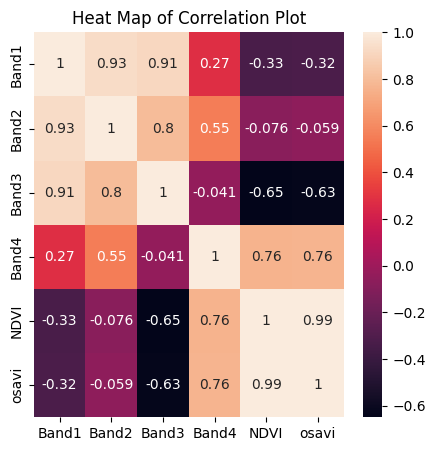

In [ ]:
# @title Correlation Plot without Removing MultiColinearity

plt.figure(figsize=(5,5))
sns.heatmap(preprocess_df.drop(columns={"class"}).corr(),annot=True)
plt.title("Heat Map of Correlation Plot")
# plt.savefig("/content/drive/MyDrive/internship/Trainig Material/Heat_Map_of_Correlation_Plot.jpg",dpi=500)
plt.show()

In [ ]:
# @title Correlation Plot

# plt.figure(figsize=(5,5))
# sns.heatmap(preprocess_df.iloc[:,[0,1,2,3,4]].corr(),annot=True)
# plt.title("Heat Map of Correlation Plot After Removing Correlated Columns")
# plt.savefig("/content/drive/MyDrive/internship/Trainig Material/Heat_Map_of_Correlation_Plot_Removing_Correlated_Columns.jpg",dpi=500)
# plt.show()

# **Pair PLot of the Data**

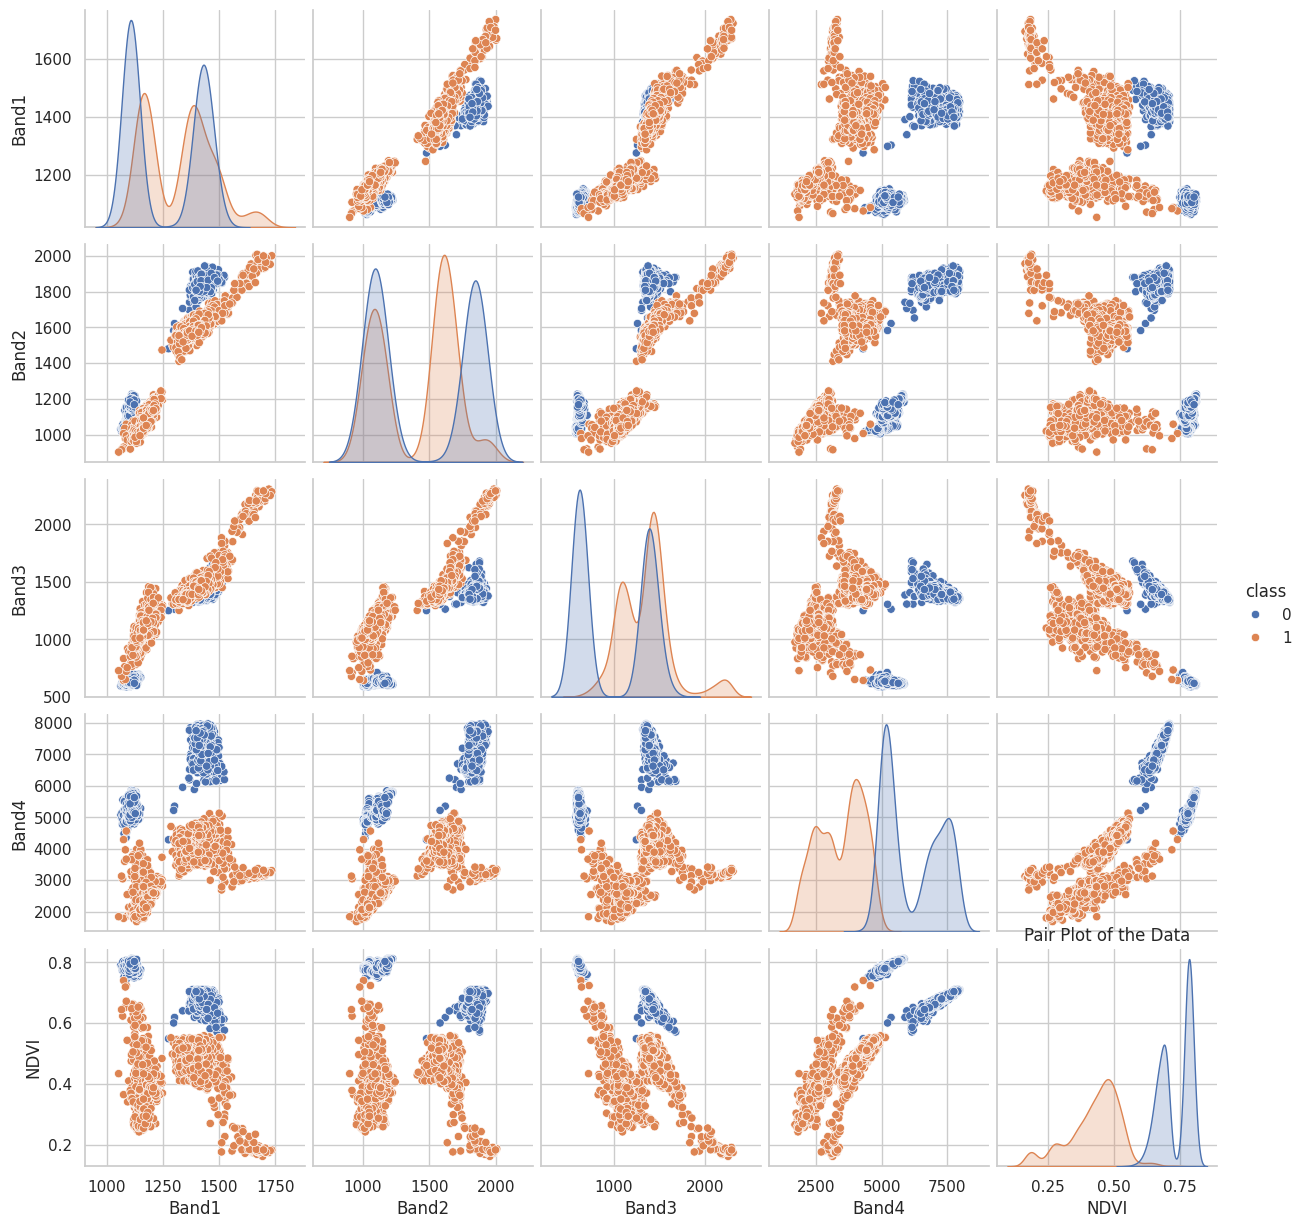

In [ ]:
# @title Pair Plot of the Data

sns.pairplot(preprocess_df.iloc[:,[0,1,2,3,4,8]],hue="class")
plt.title("Pair Plot of the Data")
plt.savefig("/content/drive/MyDrive/internship/Trainig Material/pair_plot_data.jpg",dpi=500)
plt.show()

# **Hist Plot**

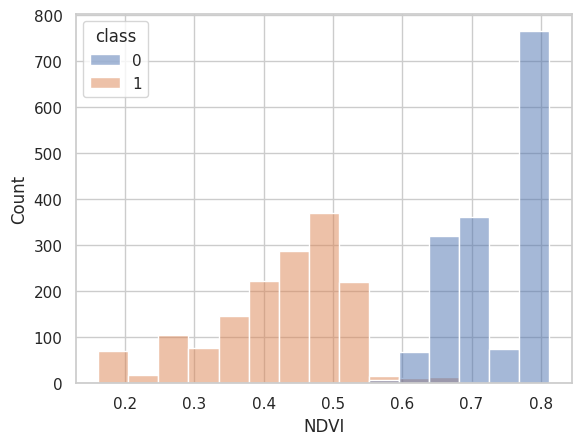

In [ ]:
sns.histplot(data=preprocess_df, x="NDVI",hue="class")
plt.show()

# **Distribution Plot**

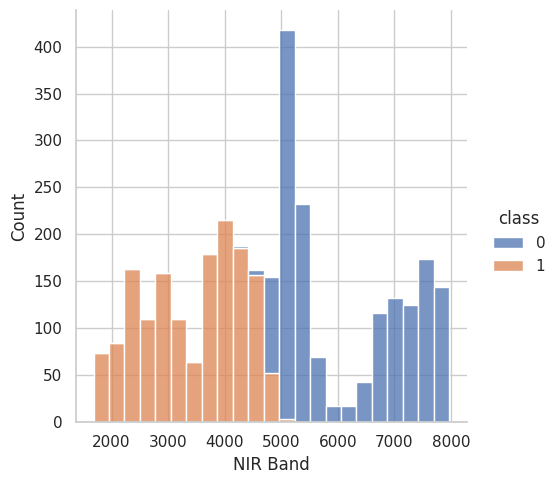

In [ ]:
# @title Distribution Plot -- Band4 (NIR)
sns.displot(data=preprocess_df.iloc[:,[0,1,2,3,4,8]], x="Band4", hue="class", multiple="stack")
plt.xlabel("NIR Band")
plt.show()

# **Kernel Density Estimation Plot**

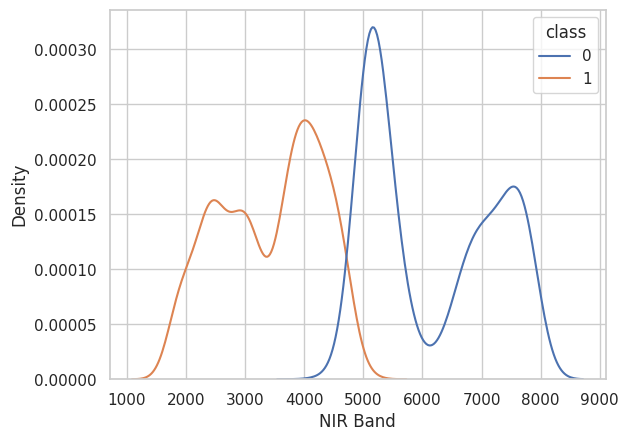

In [ ]:
# @title KDE Plot of the Data
sns.set(style="whitegrid")
sns.kdeplot(data=preprocess_df,x="Band4",hue="class")
plt.xlabel("NIR Band")
plt.ylabel("Density")
plt.show()

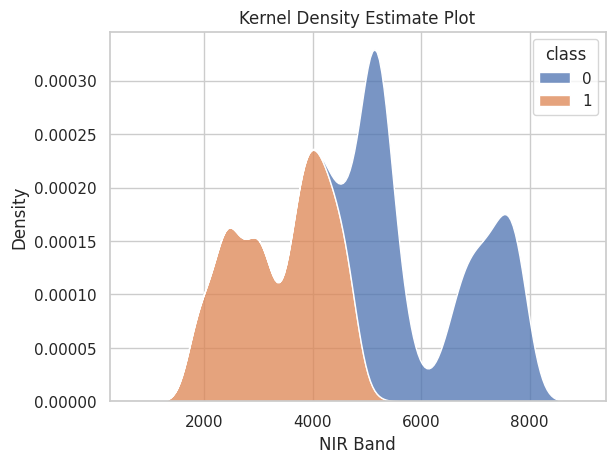

In [ ]:
sns.set(style="whitegrid")
sns.kdeplot(data=preprocess_df,x="Band4",hue="class",multiple="stack")
plt.title("Kernel Density Estimate Plot")
plt.xlabel("NIR Band")
plt.ylabel("Density")
plt.savefig("/content/drive/MyDrive/internship/Trainig Material/Kernel_Density_Estimate_Plot.jpg",dpi=500)
plt.show()

# **Feature Scaling**

In [ ]:
# X=preprocess_df.iloc[:,0:4]
# y=preprocess_df.iloc[:,-1]

X=preprocess_df.drop(columns=['class'])
y=preprocess_df.iloc[:,-2]

scaler=StandardScaler()

X_scaled=scaler.fit_transform(X)


In [ ]:
X

,Band1,Band2,Band3,Band4
0,1427,1802,1413,7312
1,1444,1834,1417,7351
2,1456,1799,1436,7303
3,1444,1824,1428,7212
4,1448,1810,1492,6736
...,...,...,...,...
839,3072,3130,3446,3915
840,2915,2746,3040,3858
841,1600,1402,1468,3326
842,1312,1210,1181,3013


# **Train Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# **Artificial Neural Network**

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.8))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=2, validation_split=0.2, callbacks=[early_stopping])

y_pred_prob = model.predict(X_test).flatten()
y_pred_binary = (y_pred_prob > 0.5).astype(int)

precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
accuracy = accuracy_score(y_test, y_pred_binary)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

Epoch 1/2
54/54 [==============================] - 1s 6ms/step - loss: 0.6891 - accuracy: 0.6074 - val_loss: 0.4604 - val_accuracy: 0.9884
Epoch 2/2
17/17 [==============================] - 0s 2ms/step
Precision: 1.0
Recall: 0.9576923076923077
Accuracy: 0.9795918367346939


In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = Sequential()
model.add(Dense(8, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.8))
model.add(Dense(18, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=2, validation_split=0.2, callbacks=[early_stopping])

y_pred_prob = model.predict(X_test).flatten()
y_pred_binary = (y_pred_prob > 0.5).astype(int)

precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
accuracy = accuracy_score(y_test, y_pred_binary)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

Epoch 1/2
54/54 [==============================] - 1s 7ms/step - loss: 0.8471 - accuracy: 0.5012 - val_loss: 0.5911 - val_accuracy: 0.9629
Epoch 2/2
17/17 [==============================] - 0s 2ms/step
Precision: 0.9601593625498008
Recall: 0.926923076923077
Accuracy: 0.9461966604823747


In [ ]:
preprocess_df.head()

,Band1,Band2,Band3,Band4,NDVI,GCI,LAI,EVI,class
0,1427,1802,1413,7312,0.676103,0.604564,0.270441,2.898202,0
1,1444,1834,1417,7351,0.676779,0.600653,0.270712,2.952826,0
2,1456,1799,1436,7303,0.671358,0.604702,0.268543,2.933500,0
3,1444,1824,1428,7212,0.669444,0.596282,0.267778,2.920622,0
4,1448,1810,1492,6736,0.637336,0.576410,0.254934,2.714848,0


In [ ]:
X=preprocess_df.iloc[:,[0,1,2,3,4,5,7]]
y=preprocess_df.iloc[:,-1]

scaler=StandardScaler()

X_scaled=scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = Sequential()
model.add(Dense(8, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.8))
model.add(Dense(18, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=2, validation_split=0.2, callbacks=[early_stopping])

y_pred_prob = model.predict(X_test).flatten()
y_pred_binary = (y_pred_prob > 0.5).astype(int)

precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
accuracy = accuracy_score(y_test, y_pred_binary)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

Epoch 1/2
54/54 [==============================] - 3s 14ms/step - loss: 0.9391 - accuracy: 0.4988 - val_loss: 0.6041 - val_accuracy: 0.8837
Epoch 2/2
17/17 [==============================] - 0s 3ms/step
Precision: 0.86
Recall: 0.945054945054945
Accuracy: 0.8940520446096655


In [ ]:
np.random.seed(60)
tf.random.set_seed(60)

model = Sequential()
model.add(Dense(8, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.8))
model.add(Dense(18, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=2, validation_split=0.2, callbacks=[early_stopping])

y_pred_prob = model.predict(X_test).flatten()
y_pred_binary = (y_pred_prob > 0.5).astype(int)

precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
accuracy = accuracy_score(y_test, y_pred_binary)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

Epoch 1/2
54/54 [==============================] - 2s 10ms/step - loss: 0.9294 - accuracy: 0.5169 - val_loss: 0.6203 - val_accuracy: 0.9698
Epoch 2/2
17/17 [==============================] - 0s 2ms/step
Precision: 0.9563636363636364
Recall: 0.9633699633699634
Accuracy: 0.9591078066914498


In [ ]:
np.random.seed(101)
tf.random.set_seed(101)

model = Sequential()
model.add(Dense(8, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.8))
model.add(Dense(18, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=3, validation_split=0.2, callbacks=[early_stopping])

y_pred_prob = model.predict(X_test).flatten()
y_pred_binary = (y_pred_prob > 0.5).astype(int)

precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
accuracy = accuracy_score(y_test, y_pred_binary)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

Epoch 1/3
54/54 [==============================] - 2s 7ms/step - loss: 0.9874 - accuracy: 0.4884 - val_loss: 0.6027 - val_accuracy: 0.9814
Epoch 2/3
54/54 [==============================] - 0s 3ms/step - loss: 0.8478 - accuracy: 0.5017 - val_loss: 0.6069 - val_accuracy: 0.9744
Epoch 3/3
17/17 [==============================] - 0s 2ms/step
Precision: 0.9368421052631579
Recall: 0.978021978021978
Accuracy: 0.9553903345724907


In [ ]:
# seed(101)
# Precision: 0.9368421052631579
# Recall: 0.978021978021978
# Accuracy: 0.9553903345724907
model.save('/content/drive/MyDrive/new_models/potato_canopy_cover')

In [ ]:
np.random.seed(101)
tf.random.set_seed(101)

model = Sequential()
model.add(Dense(8, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.8))
model.add(Dense(18, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=3, validation_split=0.2, callbacks=[early_stopping])

y_pred_prob = model.predict(X_test).flatten()
y_pred_binary = (y_pred_prob > 0.5).astype(int)

precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
accuracy = accuracy_score(y_test, y_pred_binary)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

# with modified osavi

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score


# Creating and fitting the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculating precision
precision = precision_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)


Accuracy: 1.0
Precision: 1.0


In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score


# Creating and fitting the logistic regression model
model = LogisticRegression(penalty='l2', solver='liblinear')
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculating precision
precision = precision_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)


Accuracy: 1.0
Precision: 1.0


In [ ]:
# Initialize SVC classifier
svc = SVC(kernel='rbf', C=1.0, gamma='scale')  # You can adjust the parameters as needed

# Train the SVC model
svc.fit(X_train, y_train)

# Predictions
y_pred = svc.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [ ]:
# Decision Tree Classifier
# Creating and fitting the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Making predictions on the test set
dt_y_pred = dt_model.predict(X_test)

# Calculating accuracy for decision tree
dt_accuracy = accuracy_score(y_test, dt_y_pred)

# Calculating precision for decision tree
dt_precision = precision_score(y_test, dt_y_pred)

print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Precision:", dt_precision)



Decision Tree Accuracy: 1.0
Decision Tree Precision: 1.0


In [ ]:
# Random Forest Classifier
# Creating and fitting the random forest model
rf_model = RandomForestClassifier(n_estimators=1, random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions on the test set
rf_y_pred = rf_model.predict(X_test)

# Calculating accuracy for random forest
rf_accuracy = accuracy_score(y_test, rf_y_pred)

# Calculating precision for random forest
rf_precision = precision_score(y_test, rf_y_pred)

print("\nRandom Forest Accuracy:", rf_accuracy)
print("Random Forest Precision:", rf_precision)


Random Forest Accuracy: 0.9981412639405205
Random Forest Precision: 1.0


In [ ]:
# AdaBoost Classifier
# Creating and fitting the AdaBoost model
adaboost_model = AdaBoostClassifier(n_estimators=1, random_state=42)
adaboost_model.fit(X_train, y_train)

# Making predictions on the test set
adaboost_y_pred = adaboost_model.predict(X_test)

# Calculating accuracy for AdaBoost
adaboost_accuracy = accuracy_score(y_test, adaboost_y_pred)

# Calculating precision for AdaBoost
adaboost_precision = precision_score(y_test, adaboost_y_pred)

print("AdaBoost Accuracy:", adaboost_accuracy)
print("AdaBoost Precision:", adaboost_precision)

AdaBoost Accuracy: 0.9981412639405205
AdaBoost Precision: 1.0


In [ ]:
# Gradient Boosting Classifier
# Creating and fitting the Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier(n_estimators=1, learning_rate=0.1, random_state=42)
gradient_boosting_model.fit(X_train, y_train)

# Making predictions on the test set
gradient_boosting_y_pred = gradient_boosting_model.predict(X_test)

# Calculating accuracy for Gradient Boosting
gradient_boosting_accuracy = accuracy_score(y_test, gradient_boosting_y_pred)

# Calculating precision for Gradient Boosting
gradient_boosting_precision = precision_score(y_test, gradient_boosting_y_pred)

print("Gradient Boosting Accuracy:", gradient_boosting_accuracy)
print("Gradient Boosting Precision:", gradient_boosting_precision)

Gradient Boosting Accuracy: 1.0
Gradient Boosting Precision: 1.0


In [ ]:
# Creating and fitting the Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier(n_estimators=1, learning_rate=0.1, max_depth=1, min_samples_split=2, random_state=42)
gradient_boosting_model.fit(X_train, y_train)

# Making predictions on the test set
gradient_boosting_y_pred = gradient_boosting_model.predict(X_test)

# Calculating accuracy for Gradient Boosting
gradient_boosting_accuracy = accuracy_score(y_test, gradient_boosting_y_pred)

# Calculating precision for Gradient Boosting
gradient_boosting_precision = precision_score(y_test, gradient_boosting_y_pred)

print("Gradient Boosting Accuracy:", gradient_boosting_accuracy)
print("Gradient Boosting Precision:", gradient_boosting_precision)

Gradient Boosting Accuracy: 0.9981412639405205
Gradient Boosting Precision: 1.0


In [ ]:
# XGBoost Classifier
# Creating and fitting the XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=1,objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

# Making predictions on the test set
xgb_y_pred = xgb_model.predict(X_test)

# Calculating accuracy for XGBoost
accuracy = accuracy_score(y_test, xgb_y_pred)

# Calculating precision for XGBoost
precision = precision_score(y_test, xgb_y_pred)

# Calculating recall for XGBoost
recall = recall_score(y_test, xgb_y_pred)

print("XGBoost Accuracy:", accuracy)
print("XGBoost Precision:", precision)
print("XGBoost Recall:", recall)

XGBoost Accuracy: 0.9981412639405205
XGBoost Precision: 1.0
XGBoost Recall: 0.9963369963369964


In [ ]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, n_estimators=1, learning_rate=0.1,
                              max_depth=2, reg_alpha=0.1, reg_lambda=0.01)

# Fit the model with early stopping
xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='error', early_stopping_rounds=10)

# Making predictions on the test set
xgb_y_pred = xgb_model.predict(X_test)

# Calculating accuracy for XGBoost
accuracy = accuracy_score(y_test, xgb_y_pred)

# Calculating precision for XGBoost
precision = precision_score(y_test, xgb_y_pred)

# Calculating recall for XGBoost
recall = recall_score(y_test, xgb_y_pred)

print("XGBoost Accuracy:", accuracy)
print("XGBoost Precision:", precision)
print("XGBoost Recall:", recall)

[0]	validation_0-error:0.00186
XGBoost Accuracy: 0.9981412639405205
XGBoost Precision: 1.0
XGBoost Recall: 0.9963369963369964


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


In [ ]:

# Building the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.8))
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.8))
model.add(Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.8))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=3, batch_size=10, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Epoch 1/3
172/172 [==============================] - 3s 7ms/step - loss: 1.1430 - accuracy: 0.5012 - val_loss: 0.9494 - val_accuracy: 0.8581
Epoch 2/3
172/172 [==============================] - 1s 5ms/step - loss: 0.9594 - accuracy: 0.4942 - val_loss: 0.8860 - val_accuracy: 0.7930
Epoch 3/3
17/17 [==============================] - 0s 2ms/step
Accuracy: 0.8810408921933085
Precision: 1.0
Recall: 0.7655677655677655


In [ ]:
# Building the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.6))  # Adjust dropout rate
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))  # Adjust dropout rate
model.add(Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.8))  # Adjust dropout rate
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=2, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=3, batch_size=10, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Adjust the decision threshold
threshold = 0.5  # Adjust the threshold as needed

# Predict probabilities and convert to binary predictions based on the threshold
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > threshold).astype("int32")

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Epoch 1/3
215/215 [==============================] - 2s 3ms/step - loss: 1.0232 - accuracy: 0.5665 - val_loss: 0.8036 - val_accuracy: 0.9944
Epoch 2/3
215/215 [==============================] - 1s 3ms/step - loss: 0.7592 - accuracy: 0.7177 - val_loss: 0.4679 - val_accuracy: 0.9981
Epoch 3/3
17/17 [==============================] - 0s 1ms/step
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [ ]:
model.save('/content/drive/MyDrive/new_models/potato_canopy_cover')